# **Linear Regression with PyTorch**

In this code, I have tried to develop a regression model to get the best-fit line for the equation of

**y = 4*x+4**.



In [318]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [319]:
#Create Linearly spaced array. Add noise and Calculate y. for making the staright line data slightly disturbed.
X = torch.linspace(1,20,50).reshape(-1,1)

torch.manual_seed(40)
e = torch.randint(-4,6,(50,1),dtype=torch.float)
y = 4*X + 4 + e

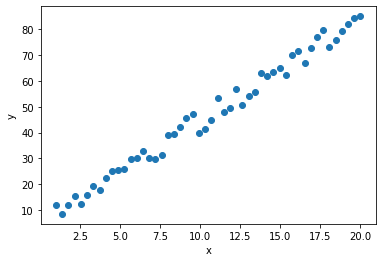

In [320]:
#See the variation in data.
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [321]:
#Prepare a Regression Model with randome weight and bias
class RModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [322]:
torch.manual_seed(67)
model = RModel(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

RModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.4759296178817749
Bias:   -0.2708982229232788


In [323]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 20.]


In [324]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.6f}, Initial bias: {b1:.6f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.475930, Initial bias: -0.270898

[0.2050314 9.247695 ]


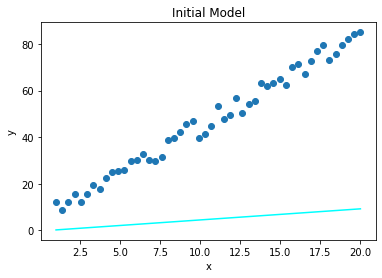

In [325]:
# At the first epoch, the status of best fit line
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'cyan')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [326]:
#Calculate MSE loss
criterion = nn.MSELoss()

In [327]:
#Apply Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [328]:
#Running Model for 50 epochs
epochs = 50
losses = []

for i in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i+1}  loss: {loss.item():.6f}  weight: {model.linear.weight.item():.6f}  bias: {model.linear.bias.item():.6f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1  loss: 2150.843506  weight: 0.475930  bias: -0.270898
epoch: 2  loss: 1106.921753  weight: 1.575985  bias: -0.186911
epoch: 3  loss: 572.766357  weight: 2.362826  bias: -0.126193
epoch: 4  loss: 299.447693  weight: 2.925619  bias: -0.082120
epoch: 5  loss: 159.593689  weight: 3.328148  bias: -0.049954
epoch: 6  loss: 88.030876  weight: 3.616036  bias: -0.026305
epoch: 7  loss: 51.411179  weight: 3.821920  bias: -0.008749
epoch: 8  loss: 32.671188  weight: 3.969145  bias: 0.004448
epoch: 9  loss: 23.079840  weight: 4.074410  bias: 0.014527
epoch: 10  loss: 18.169666  weight: 4.149661  bias: 0.022376
epoch: 11  loss: 15.654773  weight: 4.203442  bias: 0.028628
epoch: 12  loss: 14.365490  weight: 4.241864  bias: 0.033739
epoch: 13  loss: 13.703316  weight: 4.269301  bias: 0.038032
epoch: 14  loss: 13.362029  weight: 4.288880  bias: 0.041740
epoch: 15  loss: 13.184942  weight: 4.302838  bias: 0.045031
epoch: 16  loss: 13.091866  weight: 4.312775  bias: 0.048021
epoch: 17  loss: 13

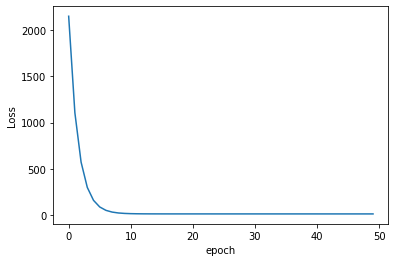

In [329]:
#plot between Loss and Epochs
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [330]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.6f}, Current bias: {b1:.6f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 4.332384, Current bias: 0.127681

[ 1. 20.]
[ 4.460065 86.77535 ]


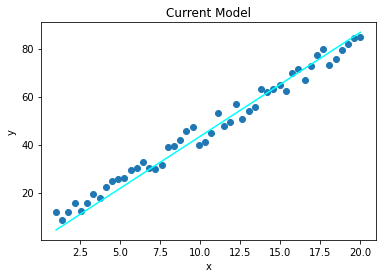

In [331]:
#At the last epoch, the status of best fit line
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'cyan')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');